In [ ]:
Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Import packages

In [ ]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

Calculates the contours for all images in the database




In [ ]:
def pre_calculate_contur(folder_path):
    """Compare contours and return the matching values"""
    db = load_comparison_watermarks(folder_path)

    db_contours=[]


    for image in db:
        input_contours = get_contour(image)
        sorted_input = sorted(input_contours, key=cv2.contourArea, reverse=True)
        # extract the second largest contour which is the shape only
        input_contours = sorted_input[1]
        db_contours.append([input_contours, image])

    return db_contours

Load target image

In [ ]:
def load_target_image(image_path):
    """Read target image and transform to binarized negative of sketch"""
    img = cv2.imread(image_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #(thresh, img_bin) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    #img_bin_inv = cv2.bitwise_not(img_bin)
    print(len(img))

    return img

Load folder with database

In [ ]:
def load_comparison_watermarks(folder_path):
    """Read comparison images and transform to binarized negative of sketch"""
    images = [cv2.imread(file) for file in glob.glob(folder_path + '/*.png')]
    #images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    return images

Show image

In [ ]:
def im_show(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(image)
    plt.title('Target Image')
    plt.show()

Get contour from image

In [ ]:
def get_contour(image, plot_contour = False):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    (thresh, img_bin) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    image = cv2.bitwise_not(img_bin)

    ret, thresh1 = cv2.threshold(image, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    if plot_contour == True:
        cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
        plt.axis('off')
        plt.imshow(image)
        plt.title('Identifying the Contours')
        plt.show()

    return contours

Compare image to DB

In [ ]:
def compare_image_to_db(img_path, db_contours):
    """Compare contours and return the matching values"""
    target = load_target_image(img_path)
    target_contour = get_contour(target)
    sorted_contours = sorted(target_contour, key=cv2.contourArea, reverse=True)
    #extract the second largest contour which is the shape only
    target_contour = sorted_contours[1]
    db = db_contours

    similar_images = 0

    similarity=[]

    for input_contours in db:
        match = cv2.matchShapes(target_contour, input_contours,3,0.0)
        similarity.append([match, input_contours])
        #print(match)

    for simil in similarity:
        if simil[0] < 0.15:
            print('simil:',simil[0])
            cv2.drawContours(target, [target_contour], -1, (0, 255, 0), 3)
            #image = cv2.cvtColor(simil[1], cv2.COLOR_BGR2RGB)
            plt.axis('off')
            plt.imshow(simil[1])
            plt.title('Best matching image')
            plt.show()
            #im_show(simil[1])

            similar_images += 1

    print("Number of similar images:", similar_images)

    return similarity

Set paths and folders

In [ ]:
path = "/content/briquet_1.png"
folder = "/content/drive/MyDrive/briquet_test"

Load target image and comparison db

In [ ]:
img = load_target_image(image_path=path)
db = load_comparison_watermarks(folder_path = folder)

256


Show target image

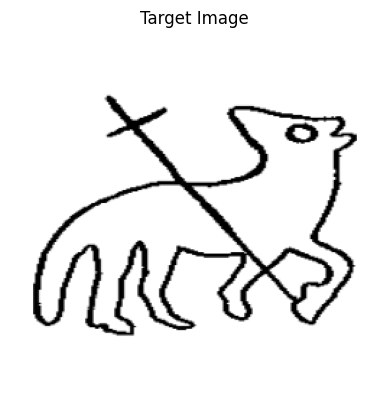

In [ ]:
im_show(img)

Calculate database of conturs for folder

In [ ]:
t0 = time.time()
db_res = pre_calculate_contur(folder)
t1 = time.time()
total = t1-t0
print(total)

0.3015248775482178


Show example of image in contourdb

In [ ]:
#print(db_res)

Compare conturs

In [ ]:
t0 = time.time()
compare_image_to_db(path,db_res)
t1 = time.time()
total = t1-t0
print(total)

256


error: ignored